#**Prediction using Supervised ML**
Level- Beginner
- Estimating a student's percentage based on the number of hours they study.
- This task involves a straightforward linear regression since it revolves around just two variables.

Author: Nikita Ballav


##Step 1 : Importing required libraries##

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import io
import requests

##Step 2 : Reading the Data from the given url##

In [3]:
url = 'http://bit.ly/w-data'

response = requests.get(url)
data = io.StringIO(response.text)
dataset = pd.read_csv(data)
# Display the entire dataset
print("Dataset:")
print(dataset)

Dataset:
    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


##Step 3 : View of the dataset##

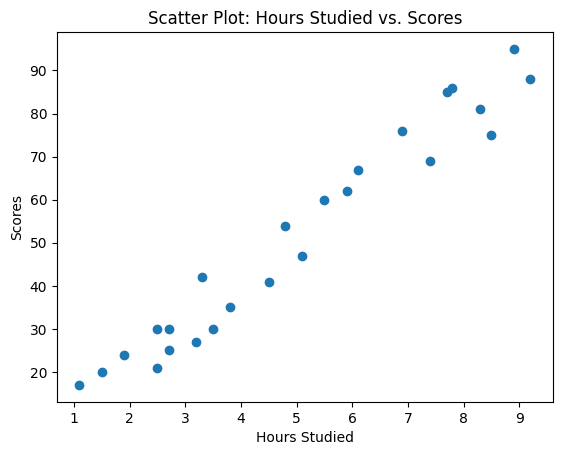

In [4]:
# Scatter plot
plt.scatter(dataset['Hours'], dataset['Scores'])
plt.title('Scatter Plot: Hours Studied vs. Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.show()

The plot indicates a evident positive linear correlation between the hours of study and the percentage of scores.

##Step 4 : Preparing the dataset for linear model##
- dividing the dataset as input "x array" and output "y array"
- reshaping the array to have one column and as many rows as needed

In [5]:
X = dataset['Hours'].values.reshape(-1, 1)
y = dataset['Scores'].values

- splitting the data into training and testing

In [6]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


##Step 5 : Training the model##

In [7]:
# Create a linear regression model
model = LinearRegression()

In [8]:
model.fit(X_train, y_train)

LinearRegression()

##Step 6 : Plotting the regression line##

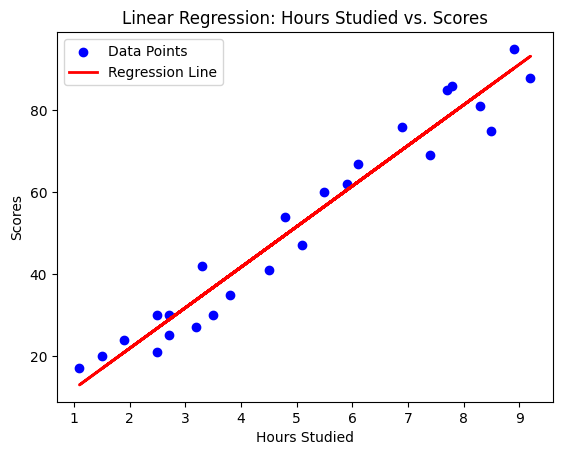

In [14]:
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.title('Linear Regression: Hours Studied vs. Scores')
plt.legend()
plt.show()

##Step 7 : Predicting the scores for the test data##

In [10]:

y_pred = model.predict(X_test)


In [11]:
# Compare actual vs. predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nTest Set Results:")
print(df)


Test Set Results:
   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


In [15]:
# Predict the score for 9.25 hours
hours = 9.25
predicted_score = model.predict([[hours]])

print(f'Predicted Score for {hours} hours/day: {predicted_score[0]:.2f}')


Predicted Score for 9.25 hours/day: 93.69


##Step 8 : Model Evaluation##

In [16]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373


The provided metrics give insights into the performance of the linear regression model on the test set:

1. **Mean Absolute Error (MAE):** The MAE represents the average absolute difference between the actual and predicted values. In this case, the MAE is approximately 4.18. This implies that, on average, the model's predictions have an absolute error of around 4.18 percentage points from the actual scores.

2. **Mean Squared Error (MSE):** The MSE measures the average squared difference between the actual and predicted values. The MSE is approximately 21.60. This metric is sensitive to larger errors, as it squares the differences.

3. **Root Mean Squared Error (RMSE):** The RMSE is the square root of the MSE and provides a more interpretable scale. In this case, the RMSE is approximately 4.65. Like the MAE, it indicates the average magnitude of the errors.

**Conclusion:**
The model's performance, based on the provided error metrics, is reasonably good. The low values of MAE, MSE, and RMSE suggest that the model is making accurate predictions, with errors averaging around 4 percentage points.